# Question 2: Seasonality

Objeective: Is there a relationship between the date of inspections (date recorded) and the documented functionality of a waterpoint? For instance, are wells more likely to be observed as non-functional during dry season? Does the quantity of water change seasonally? *Data from [Safari Tours](https://www.safaribookings.com/tanzania/climate)*

    Tanzania average rainfall seasons:
    Dry season – June to October (6 - 10)
    Wet season – "Short Rains" November to May (11 - 2), and "Long Rains" March to May (3 - 5)
    

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import plotly.offline as pyo
pyo.init_notebook_mode()

*Custom colormap function sourced with much gratitude from [Kelly Halupka](https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72).*

In [29]:
def hex_to_rgb(value):
    '''Converts hex to rgb colours'''
    value = value.strip("#") 
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''Converts rgb to decimal colours (i.e. divides each value by 256)'''
    return [v/256 for v in value]


def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        '''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [62]:
# build a custom colormap to depict the rainy season in Tanzania
hex_list_2 = ['#a9e8d0' ,'#a9e8d0', # short_rain
            '#62d2de', '#62d2de', '#62d2de', # heavy_rain
            '#f8c2d3','#f8c2d3', '#f8c2d3' ,'#f8c2d3', # dry
            '#a9e8d0', '#a9e8d0']

cust_color = get_continuous_cmap(hex_list_2, float_list=None)

In [31]:
df_train = pd.read_csv("../data/cleaned_train_df.csv")
df_train.head(3)

,id,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,...,management,payment,water_quality,quantity,source,waterpoint_type,status_group,year_rec,month_rec,age
0,69572,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,other,109,...,vwc,pay annually,soft,enough,spring,communal standpipe,functional,2011,3,12
1,8776,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,other,280,...,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2013,3,3
2,34310,686,37.460664,-3.821329,Pangani,Manyara,21,4,other,250,...,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,2013,2,4


In [32]:
funct = df_train.loc[df_train['status_group'] == 'functional']
fnr = df_train.loc[df_train['status_group'] == 'functional needs repair']
non_funt = df_train.loc[df_train['status_group'] == 'non functional']

### Seasonal Waterpoint Status Check Distributions
Plot Key: For the plots below, please be aware of the representaion of the colorbar.

    The pale green/blue marks the dry season (June to October)
    Light blue marks the low rainy season (November to February)
    Dark blue marks the heavy rainy season (March to May)

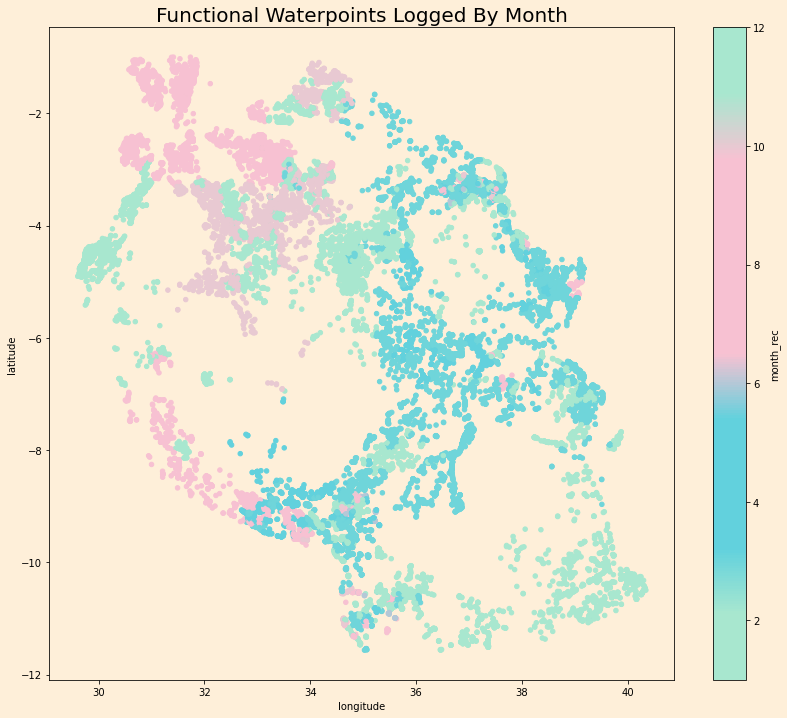

In [71]:
fig, ax = plt.subplots(facecolor='#feefd9')
funct.plot(kind="scatter", x="longitude", y="latitude", figsize=(14, 12), 
                c='month_rec', colormap=cust_color, ax=ax, alpha=1);
ax.set_facecolor('#feefd9')
ax.set_title("Functional Waterpoints Logged By Month", fontsize = 20)
ax.set_xlabel('longitude')
plt.show()

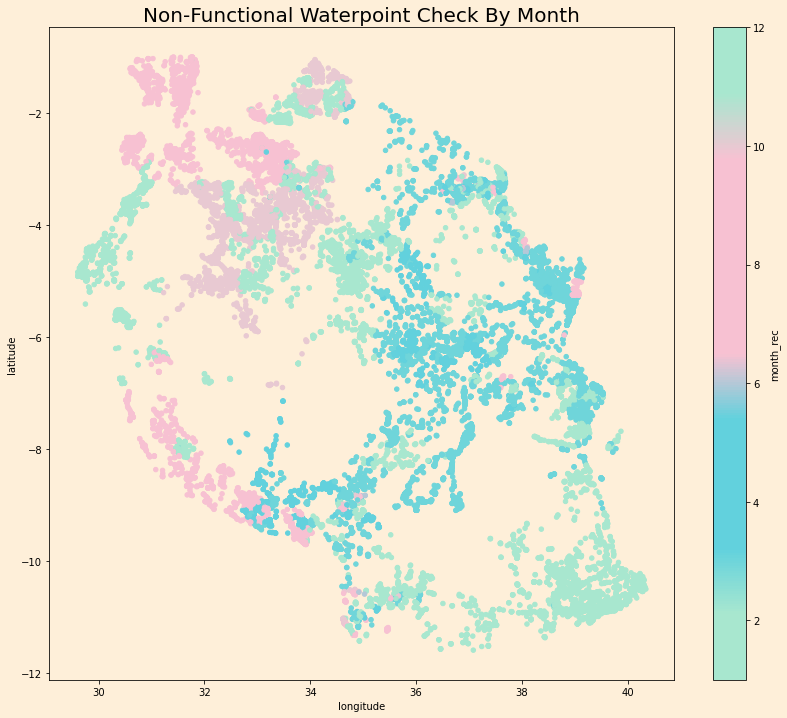

In [72]:
fig, ax = plt.subplots(facecolor='#feefd9')
non_funt.plot(kind="scatter", x="longitude", y="latitude", figsize=(14, 12), 
                c='month_rec', colormap=cust_color, ax=ax, alpha=1);
ax.set_facecolor('#feefd9')
ax.set_title("Non-Functional Waterpoint Check By Month", fontsize = 20)
ax.set_xlabel('longitude')
plt.show()

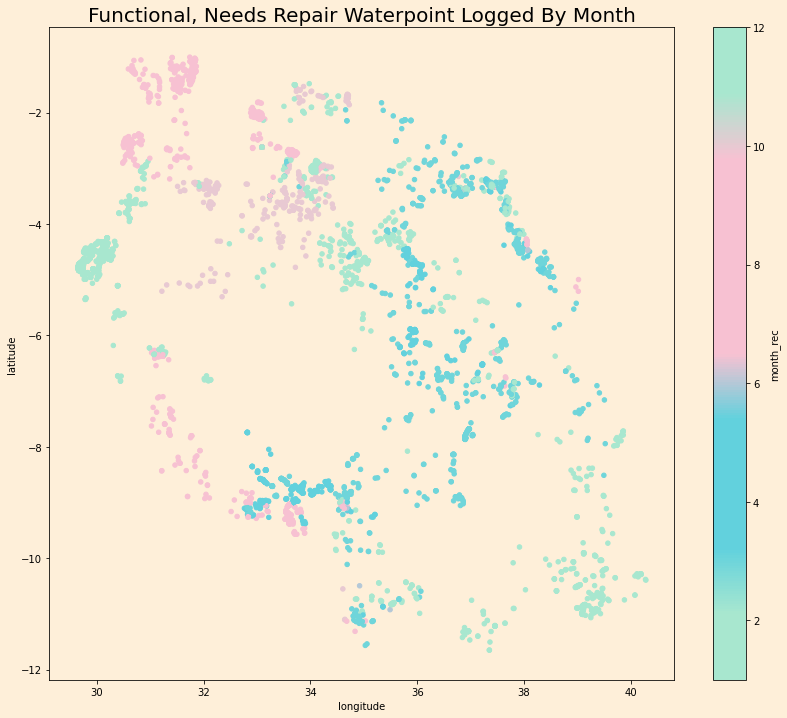

In [73]:
fig, ax = plt.subplots(facecolor='#feefd9')
fnr.plot(kind="scatter", x="longitude", y="latitude", figsize=(14, 12), 
                c='month_rec', colormap=cust_color, ax=ax, alpha=1);
ax.set_facecolor('#feefd9')
ax.set_title("Functional, Needs Repair Waterpoint Logged By Month", fontsize = 20)
ax.set_xlabel('longitude')
plt.show()

Instead of depicting any skew towards one month/season depicting more of a particular well-status, there is a mostly even spread per month, between the different satuses. This visual mostly just shows the route in which the watter points are checked. This may be due to many reasons: ease of access to certain areas in particular months, routine schedules for re-checking wells, etc.

In [36]:
# build 'Average Monthly Rainfall' dictionary
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rainfail_in_mon = {'Jan': 2.3, 'Feb': 3.3, 'Mar': 7, 'Apr': 11.5, 'May': 8.3, 
                    'Jun': 1.3, 'Jul': 0.6, 'Aug': 0.8, 'Sep': 0.8, 'Oct': 1.4, 'Nov': 4.4, 'Dec': 4}
rain_df = pd.DataFrame.from_dict(rainfail_in_mon, orient='index').reset_index()
rain_df.columns = ['month', 'rain_in']
rain_df['scaled'] = rain_df.rain_in.multiply(1000)
rain_df.head(3)

,month,rain_in,scaled
0,Jan,2.3,2300.0
1,Feb,3.3,3300.0
2,Mar,7.0,7000.0


In [40]:
# plot 'Average Monthly Rainfall' against quantity per status of waterpoints, by month
fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=list(funct.groupby('month_rec')['id'].count().values),
    name='Functional',
    marker_color='#9cdce3'
))
fig.add_trace(go.Bar(
    x=months,
    y=list(non_funt.groupby('month_rec')['id'].count().values),
    name='Non-Functional',
    marker_color='#ff9900'
))
fig.add_trace(go.Bar(
    x=months,
    y=list(fnr.groupby('month_rec')['id'].count().values),
    name='Functional, Needs Repair',
    marker_color='#f8c2d3'
))

fig.add_trace(
    go.Scatter(
        x=rain_df['month'],
        y=rain_df['scaled'],
        name="Avg. Monthly Rainfall (inches)",
        line_color='darkblue',
        text = rain_df['rain_in'],
        hoverinfo = 'text'
    ))

fig.update_layout(
    title='Water Point Status by Month, Avg. Rainfall Added',
    plot_bgcolor ='#feefd9', paper_bgcolor = '#feefd9')

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

*NOTE: The rainfall line has been scaled from inches to thousand inches to be able to share a y-axis. Ratio remains the same, but for the rain line '2k' equals 2 inches of rain, etc.* ***Hover over each point to see the value in inches.***

We can see the greatest amount of surveying occurs at the begining of the year in February and March. Surveying drops significantly during the heavy rain season in April - May. Perhaps due to road access or less urgency, if there is a way to harvest rainwater. It may be best to check the pumps *before* dry season to make sure the nearby population has a water source, instead of checking during the drought when it may be too late.

The ratio of Function to Non-Function is relatively close throughout the year, except for February and March, where there is about 30% and 45% more reported functional wells, respectively. This follows the end of the low rain season and into the middle of the heavy rain season.

#### Conclusion
Seasonality does have an effect on water pump functionality. Pumps are more likely to be functional after wet season has been past. During the other times the reporting is much more equal.

#### Reccomendation
Collect more data on pump functionality during the rest of the heavy rain season (April - May) to be sure pumps are ready for dry season. Examine reason for less data collected during these times (too great a cost, difficiult to reach areas, etc?). 